In [2]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd
import re

import plots

date = "22_03_23"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

ModuleNotFoundError: No module named 'mcbj'

In [2]:
after_evap = np.arange(start=36002, stop=56200, step=1)

hist = Histogram(folder=home_folder,
                 traces=after_evap[:8000],  #8000
                 conductance_range=(10**(-5.82391), 10**(-5.82391+100*0.0689284)),  # 4.229e-5
                 conductance_bins_num=100,
                 conductance_bins_mode='total')

In [3]:
hist.calc_stats(align_at=0.5,
                range_pull=(-1, 1),
                range_push=(-0.5, 1.5))

  0%|          | 0/8000 [00:00<?, ?it/s]

Pull 2D histogram created from 8000 traces
Push 2D histogram created from 8000 traces


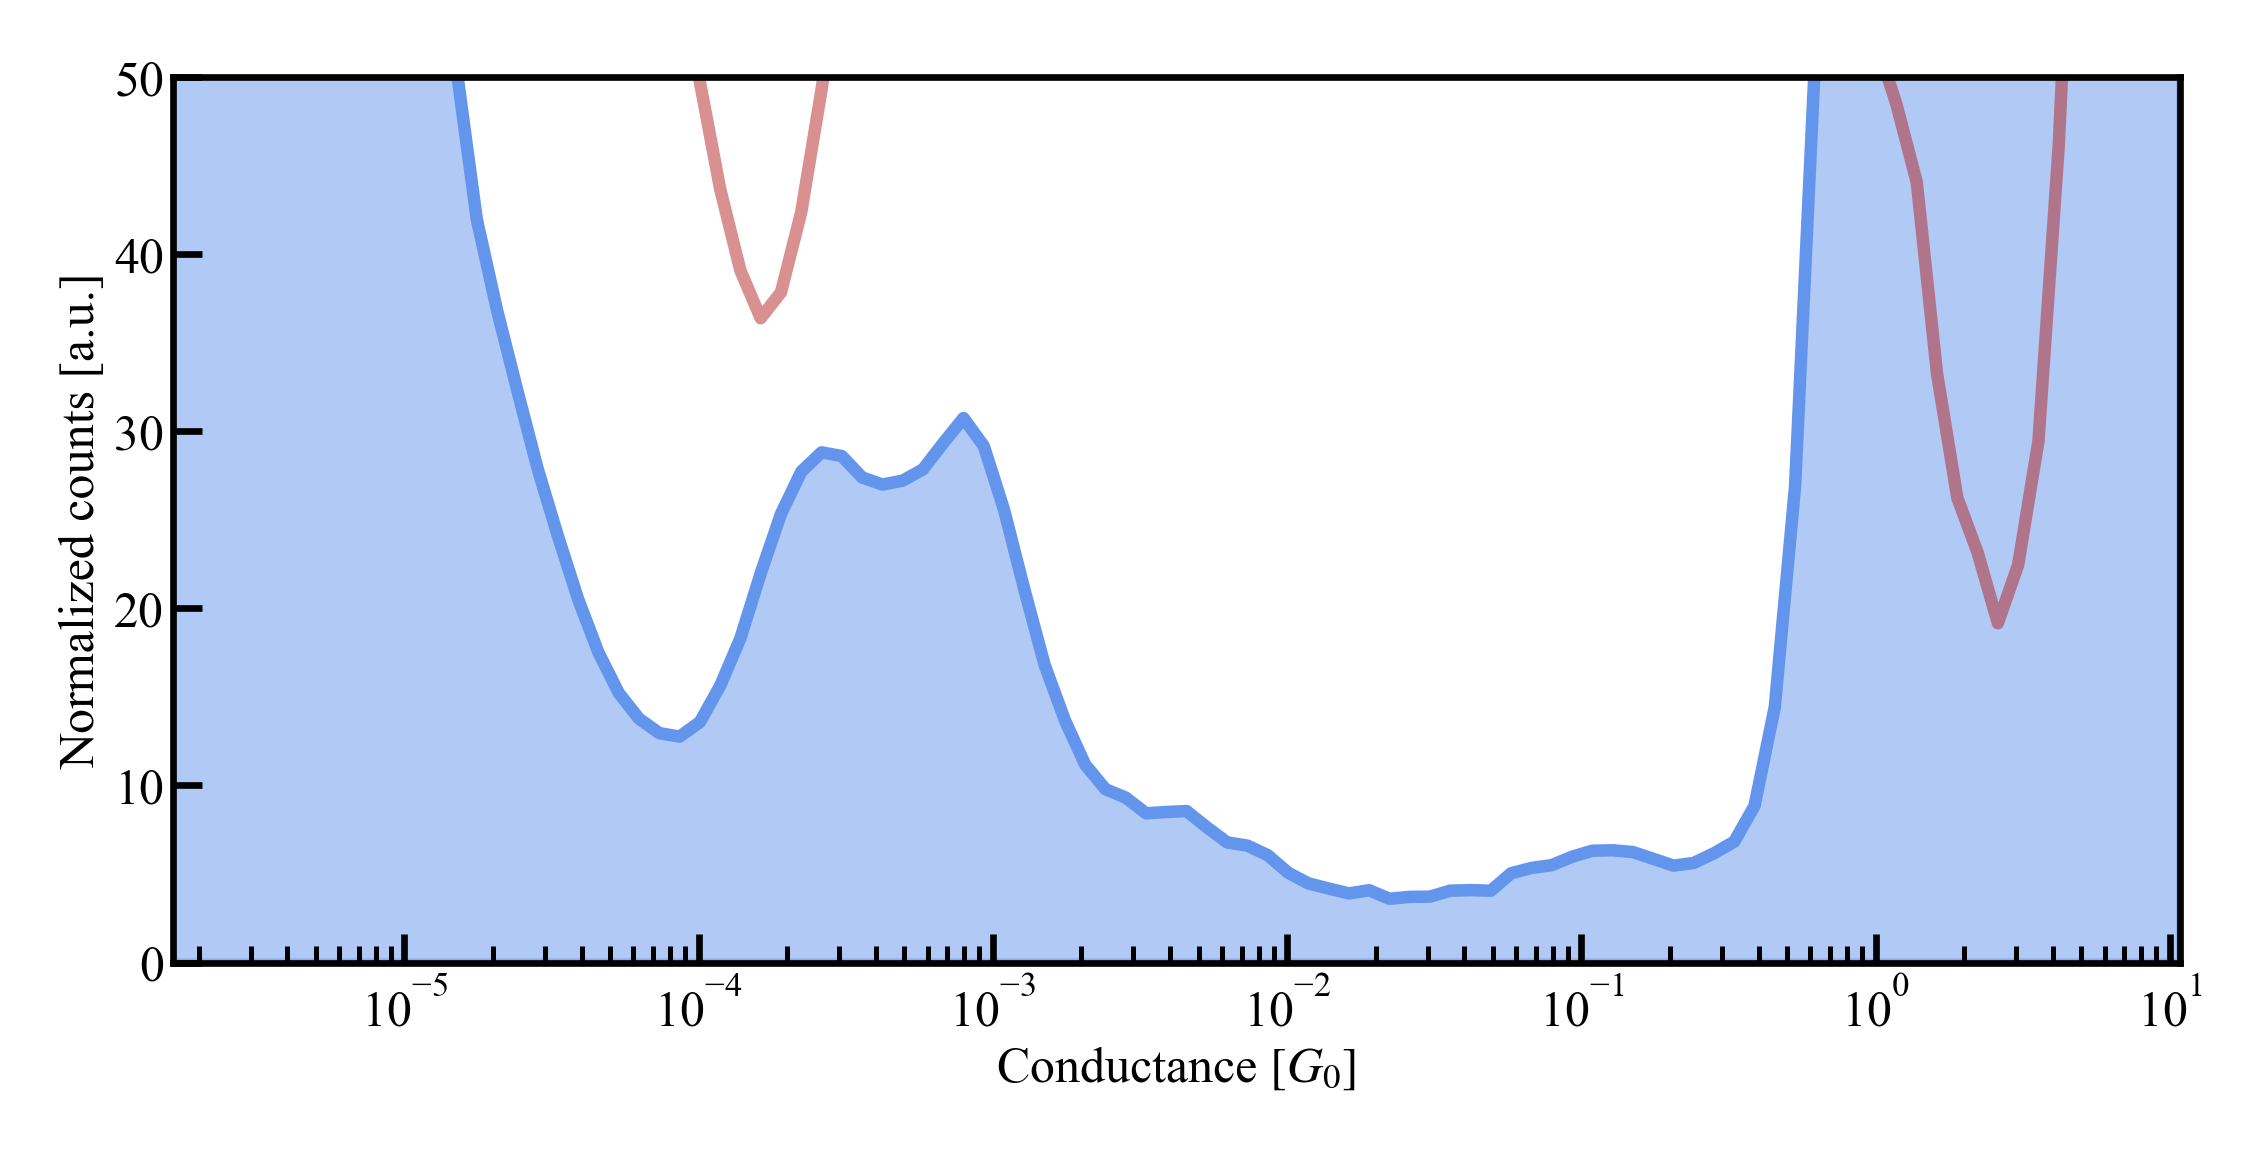

In [64]:
ax = hist.plot_hist_1d(ylims=(0, 50))

In [4]:
nori_hist_1d = np.loadtxt(home_folder.joinpath('Nori_PCA/POConductanceHist1D_all_long.txt'), skiprows=1)
nori_hist_bins = 10**np.arange(start=-5.82391, step=0.0689284, stop=-5.82391+100*0.0689284)

In [5]:
pc_nori=PCA(hist=hist)
pc_nori.load_principal_components(fname=home_folder.joinpath('Nori_PCA/STM_PCs.txt'), source_type='igor')
# pc_nori.hist.hist_1d_bins = nori_hist_bins
# pc_nori.hist.hist_1d_pull = nori_hist_1d

In [6]:
pc_nori.project_to_pcs()
pc_nori.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
pc_nori.select_percentage(20, calc_histograms=True)

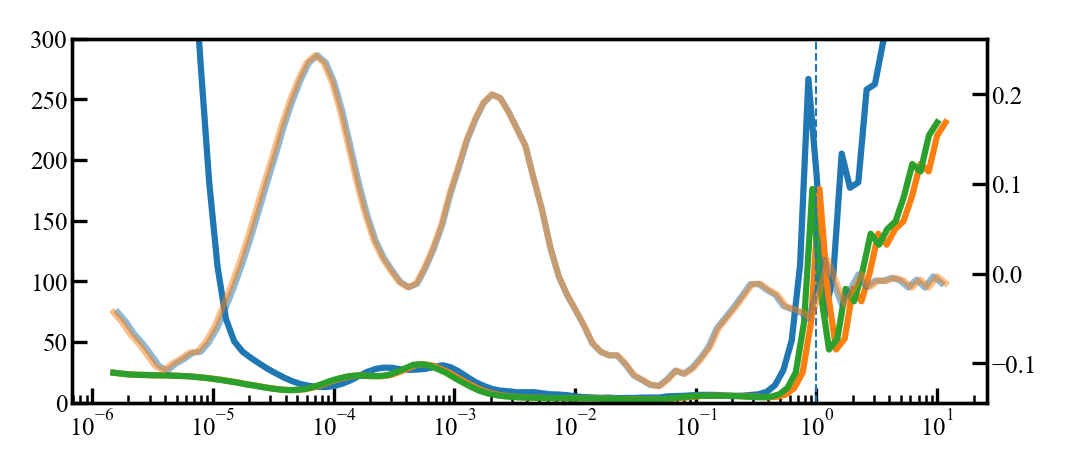

In [8]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 4), dpi=300)
ax.plot(pc_nori.hist.hist_1d_bins, pc_nori.hist.hist_1d_pull)
ax.plot(np.logspace(start=-5.82391, stop=-5.82391+100*0.0689284, num=100, base=10), 3*nori_hist_1d)
ax.plot(nori_hist_bins, 3*nori_hist_1d)
par = ax.twinx()
par.plot(pc_nori.hist.hist_1d_bins, pc_nori.principal_components['PC4'], alpha=0.5)
par.plot(np.logspace(start=-5.82391, stop=-5.82391+100*0.0689284, num=100, base=10), pc_nori.principal_components['PC4'], alpha=0.5)
ax.set_xscale('log')
ax.set_ylim(0, 300)
ax.axvline(1, ls='--', lw=0.5)

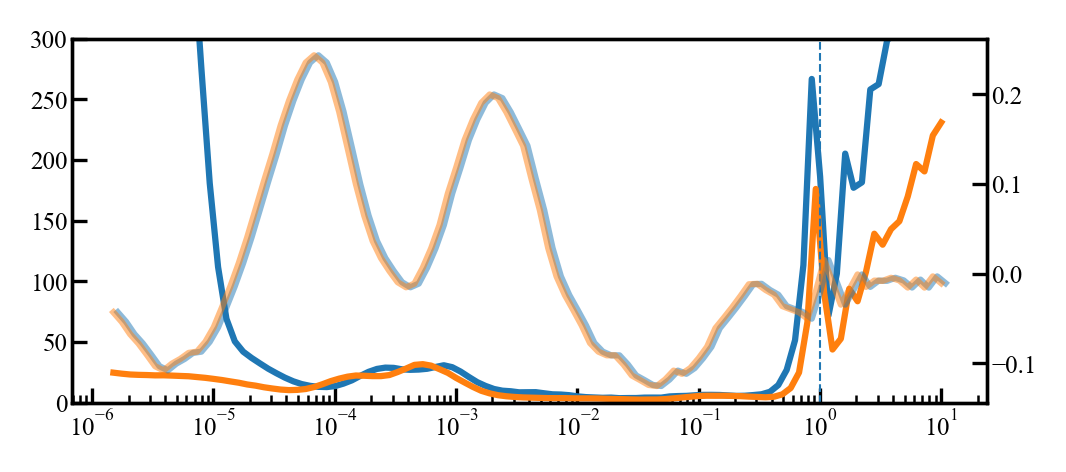

In [9]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 4), dpi=300)
ax.plot(pc_nori.hist.hist_1d_bins, pc_nori.hist.hist_1d_pull)
ax.plot(nori_hist_bins, 3*nori_hist_1d)
par = ax.twinx()
par.plot(pc_nori.hist.hist_1d_bins, pc_nori.principal_components['PC4'], alpha=0.5)
par.plot(nori_hist_bins, pc_nori.principal_components['PC4'], alpha=0.5)
ax.set_xscale('log')
ax.set_ylim(0, 300)
ax.axvline(1, ls='--', lw=0.5)

<AxesSubplot:>

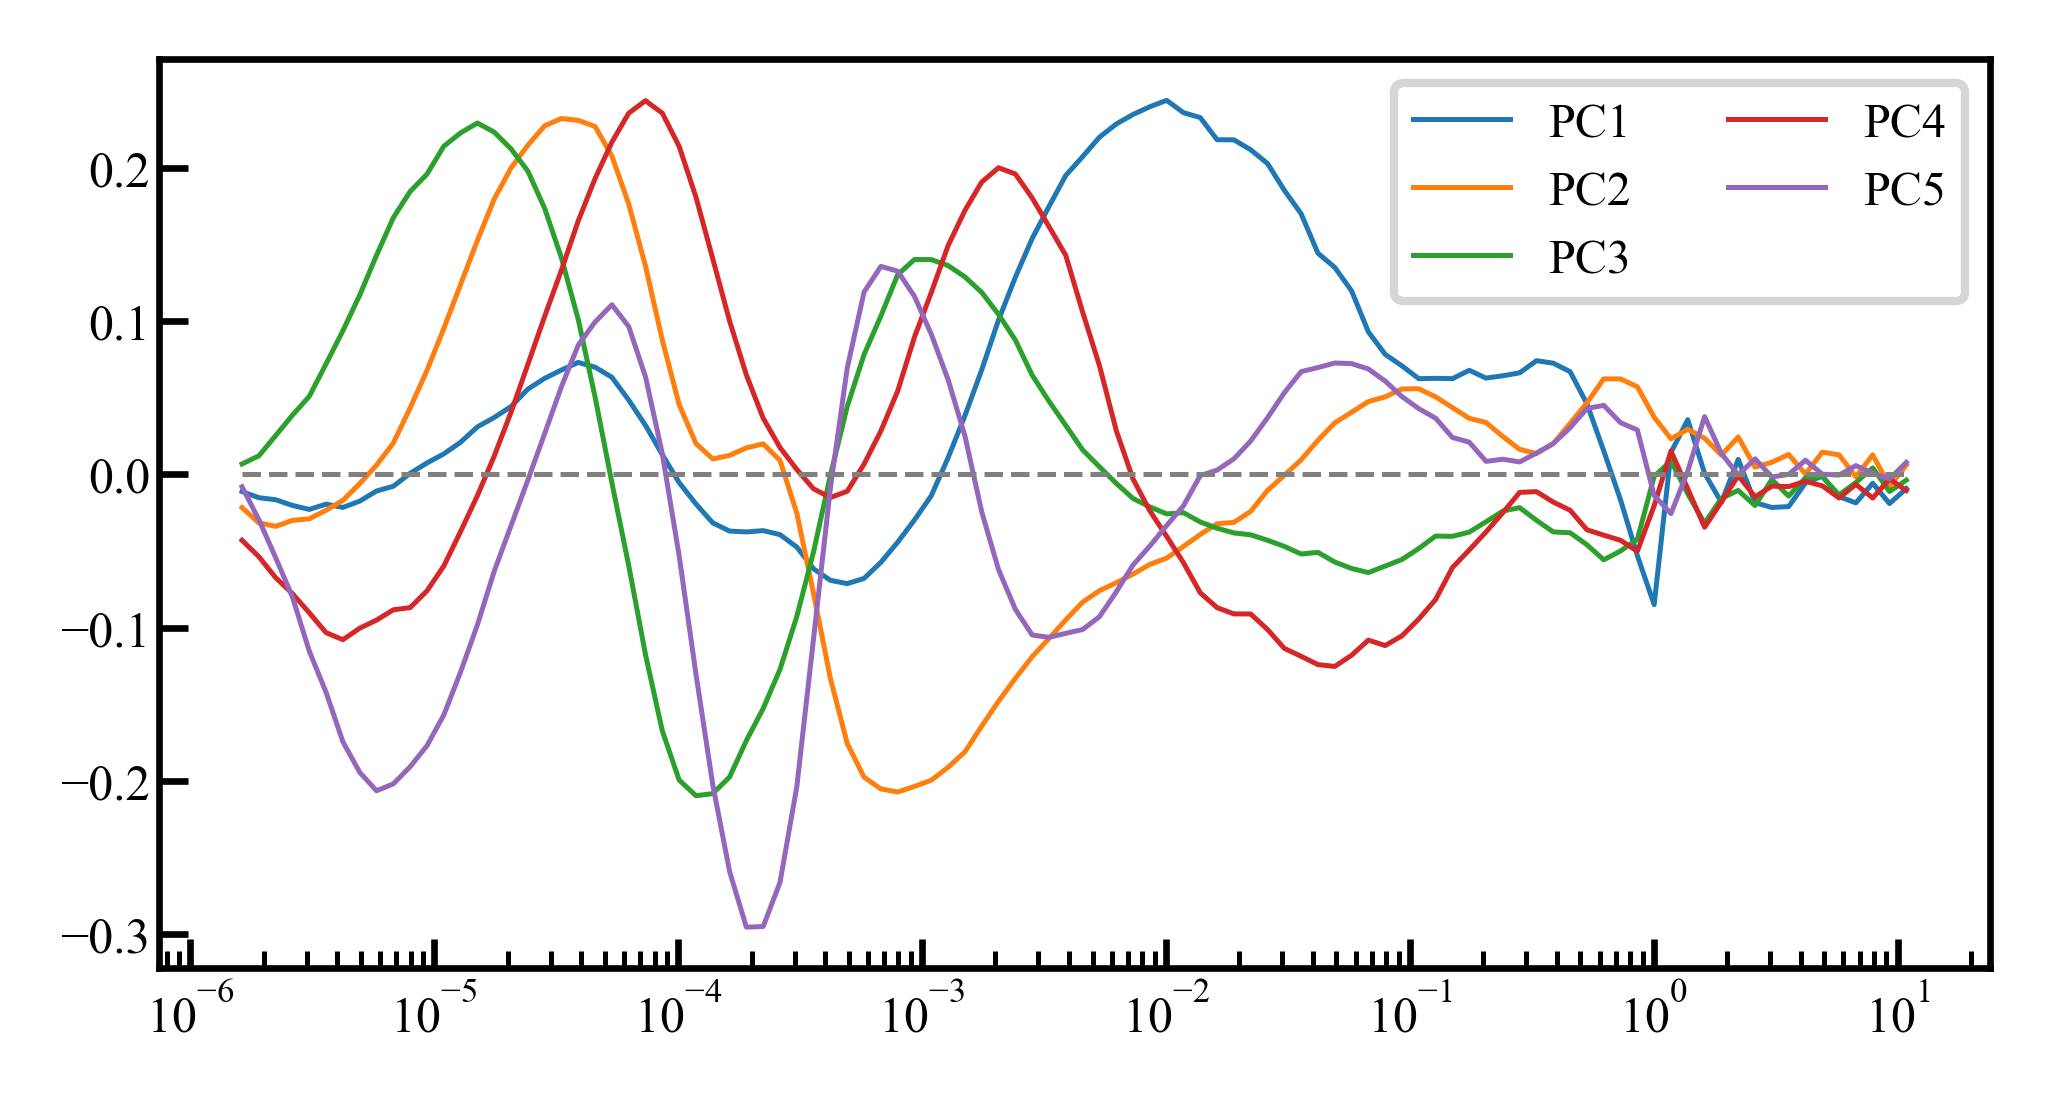

In [10]:
pc_nori.plot_pcs()

In [11]:
pc_nori.traces_group1

{'PC1': array([39443, 44000, 36116, ..., 38139, 40923, 41563]),
 'PC2': array([43604, 39468, 39463, ..., 39616, 41061, 37580]),
 'PC3': array([43940, 41314, 42388, ..., 38744, 38107, 40743]),
 'PC4': array([43604, 38390, 40975, ..., 40703, 36832, 40809]),
 'PC5': array([39449, 39453, 43604, ..., 39646, 42307, 39596])}

In [12]:
pc_nori.calc_group_histograms(chosen_pc=('PC2', 'PC4'),
                              conductance_range=(1e-5, 10),
                              conductance_bins_num=100,
                              conductance_log_scale=True,
                              conductance_bins_mode='total')

Calculating 1D and 2D histograms of PC2 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC2 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group1.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces
Calculating 1D and 2D histograms of PC4 group2.


  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

2D histogram pull direction created from 1600 traces
2D histogram push direction created from 1600 traces


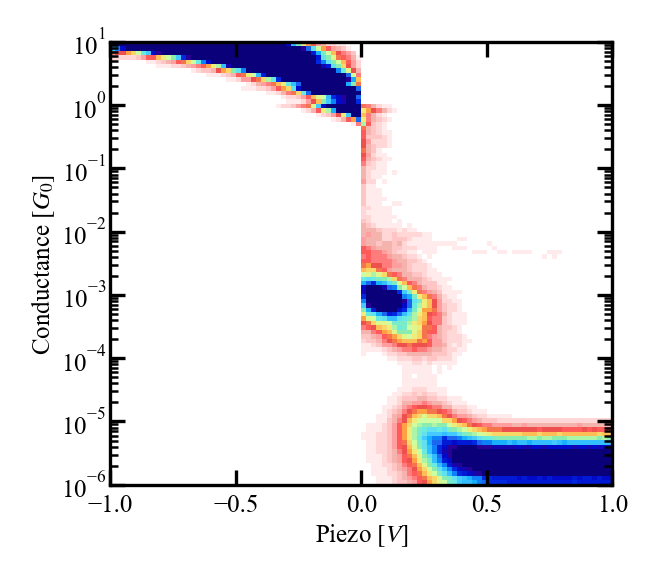

In [13]:
ax_pull = pc_nori.hist_group1['PC2'].plot_hist_2d_one(direction='pull', dpi=300, vmax=12000)

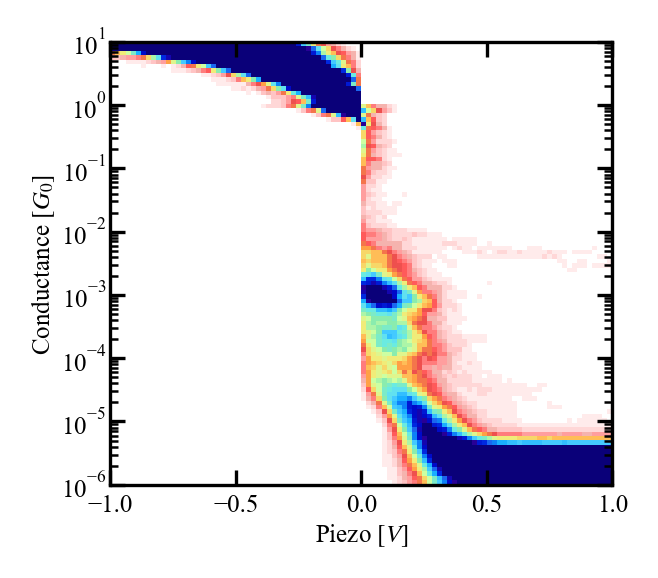

In [14]:
ax_pull = pc_nori.hist_group2['PC4'].plot_hist_2d_one(direction='pull', dpi=300, vmax=8000)

(0.0, 260.0)

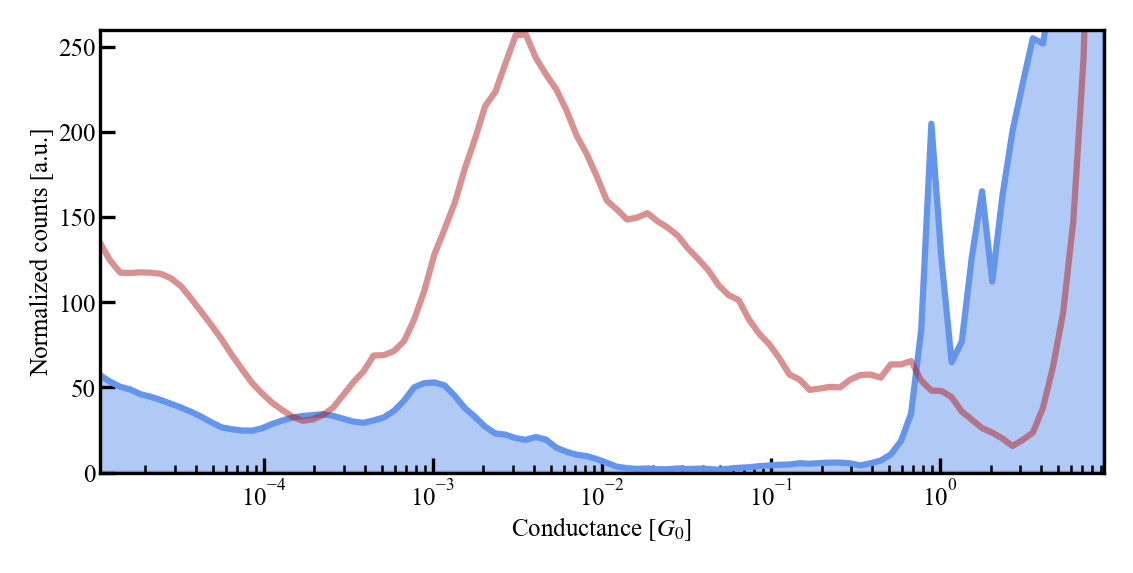

In [15]:
ax_pull = pc_nori.hist_group2['PC4'].plot_hist_1d(dpi=300)
ax_pull.set_ylim(0, 260)

In [16]:
# np.random.choice(pc_nori.traces_group2['PC4'])
trace_pair = TracePair(np.random.choice(pc_nori.traces_group2['PC4']), load_from=home_folder)

(44.0, 46.0)

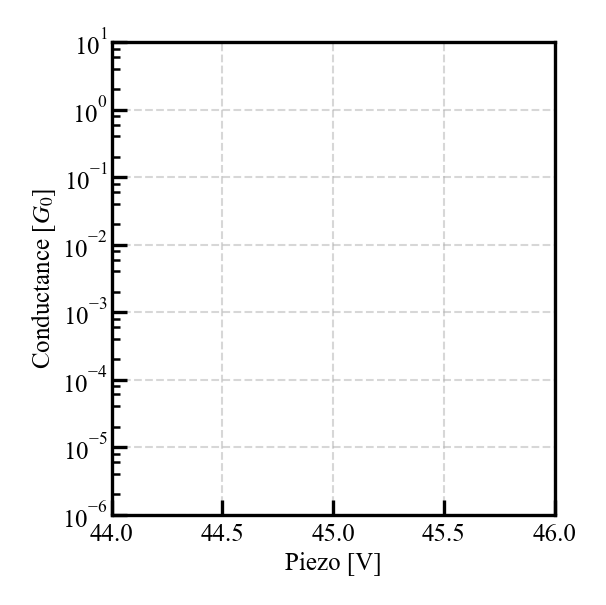

In [17]:
ax = trace_pair.plot_trace_pair(aligned=False, dpi=300)
ax.set_ylim(1e-6, 10)
ax.set_xlim(44, 46)
# ax.axvline(0, ls=(0, (5, 7)), lw=0.5, c='k')
# trace_pair.align_trace(align_at=2e-2)

In [26]:
with h5py.File(home_folder.joinpath('Nori_PCA/noise_data_start-end_both_config.h5'), 'w') as f:
    # for pc_key in pc.pc_keys:
    pc_key='PC4'
    pc_group = f.create_group(name=pc_key)
    group1_group = pc_group.create_group(name='group1')
    group2_group = pc_group.create_group(name='group2')
    for trace in tqdm(pc_nori.traces_group1[pc_key], desc=f'Noise analysis of traces {pc_key} group 1'):
        trace_pair = TracePair(trace, load_from=home_folder)
        conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
            temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                win_size=256, step_size=None, skip_points=50, end_point=3000,
                tolerance=2, filter_method='avg_dev', freq_range=(2000, 5000))

        trace_group = group1_group.create_group(name=f'trace_{trace}')

        trace_group.create_dataset(name='conductance', data=conductance)
        trace_group.create_dataset(name='piezo', data=piezo)
        trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
        trace_group.create_dataset(name='psd_results', data=psd_results)
        trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
        trace_group.create_dataset(name='areas', data=areas)
        trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

    for trace in tqdm(pc_nori.traces_group2[pc_key], desc=f'Noise analysis of traces {pc_key} group 2'):
        trace_pair = TracePair(trace, load_from=home_folder)
        conductance, piezo, psd_intervals, psd_results, fft_freqs, avg_conductance_in_win, areas = \
            temporal_noise_single_trace(trace_pair=trace_pair, align_at=2e-2, interpolate=False,
                win_size=256, step_size=None, skip_points=50, end_point=3000,
                tolerance=2, filter_method='avg_dev', freq_range=(2000, 5000))

        trace_group = group2_group.create_group(name=f'trace_{trace}')

        trace_group.create_dataset(name='conductance', data=conductance)
        trace_group.create_dataset(name='piezo', data=piezo)
        trace_group.create_dataset(name='psd_intervals', data=psd_intervals)
        trace_group.create_dataset(name='psd_results', data=psd_results)
        trace_group.create_dataset(name='fft_freqs', data=fft_freqs)
        trace_group.create_dataset(name='areas', data=areas)
        trace_group.create_dataset(name='avg_conductance_in_win', data=avg_conductance_in_win)

Noise analysis of traces PC4 group 1:   0%|          | 0/1600 [00:00<?, ?it/s]

Noise analysis of traces PC4 group 2:   0%|          | 0/1600 [00:00<?, ?it/s]

In [27]:
areas_all_1 = []
areas_all_2 = []
cond_avg_all_1 = []
cond_avg_all_2 = []
pc_key='PC4'
for trace_ind in tqdm(range(0, 1600)):
    with h5py.File(home_folder.joinpath('Nori_PCA/noise_data_start-end_both_config.h5'), 'r') as f:
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group1'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_1=TracePair(trace, load_from=home_folder)
        # conductance_1 = f[f'{pc_key}/group1/trace_{trace}/conductance'][:]
        # piezo_1 = f[f'{pc_key}/group1/trace_{trace}/piezo'][:]
        # psd_intervals_1 = f[f'{pc_key}/group1/trace_{trace}/psd_intervals'][:]
        # psd_results_1 = f[f'{pc_key}/group1/trace_{trace}/psd_results'][:]
        # fft_freqs_1 = f[f'{pc_key}/group1/trace_{trace}/fft_freqs'][:]
        areas_1 = f[f'{pc_key}/group1/trace_{trace}/areas'][:]
        avg_conductance_in_win_1 = f[f'{pc_key}/group1/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_1.append(areas_1)
        cond_avg_all_1.append(avg_conductance_in_win_1)
        
        trace = re.search(r'_(\d*)', list(f[f'{pc_key}/group2'].keys())[trace_ind])[1]
        # print(trace)

        # trace_pair_2=TracePair(trace, load_from=home_folder)
        # conductance_2 = f[f'{pc_key}/group2/trace_{trace}/conductance'][:]
        # piezo_2 = f[f'{pc_key}/group2/trace_{trace}/piezo'][:]
        # psd_intervals_2 = f[f'{pc_key}/group2/trace_{trace}/psd_intervals'][:]
        # psd_results_2 = f[f'{pc_key}/group2/trace_{trace}/psd_results'][:]
        # fft_freqs_2 = f[f'{pc_key}/group2/trace_{trace}/fft_freqs'][:]
        areas_2 = f[f'{pc_key}/group2/trace_{trace}/areas'][:]
        avg_conductance_in_win_2 = f[f'{pc_key}/group2/trace_{trace}/avg_conductance_in_win'][:]
        
        areas_all_2.append(areas_2)
        cond_avg_all_2.append(avg_conductance_in_win_2)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [28]:
areas_all_1 = np.array(areas_all_1)
cond_avg_all_1 = np.array(cond_avg_all_1)
areas_all_2 = np.array(areas_all_2)
cond_avg_all_2 = np.array(cond_avg_all_2)

In [60]:
xrange = (1e-5, 1e-2)
yrange = (1e-2, 1)

num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])

xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=int(20 * num_of_decs_x)+1)
ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(20 * num_of_decs_y)+1)

h_both_1, xedges, yedges = np.histogram2d(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0],
                                          np.sqrt(areas_all_1.flatten()[cond_avg_all_1.flatten()>0])/(cond_avg_all_1.flatten()[cond_avg_all_1.flatten()>0]),
                                          bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr1_avg_dev_both_config.txt'), h_both_1)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr1_avg_dev_both_config.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr1_avg_dev_both_config.txt'), y_mesh)

h_both_2, xedges, yedges = np.histogram2d(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0],
                                          np.sqrt(areas_all_2.flatten()[cond_avg_all_2.flatten()>0])/(cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0]),
                                          bins=[xbins, ybins])
x_mesh, y_mesh = np.meshgrid(xedges, yedges)

np.savetxt(home_folder.joinpath('results/noise_power_2d_PC4_gr2_avg_dev_both_config.txt'), h_both_2)
np.savetxt(home_folder.joinpath('results/noise_power_2d_x_mesh_PC4_gr2_avg_dev_both_config.txt'), x_mesh)
np.savetxt(home_folder.joinpath('results/noise_power_2d_y_mesh_PC4_gr2_avg_dev_both_config.txt'), y_mesh)

In [58]:
cond_avg_all_2.flatten()[cond_avg_all_2.flatten()>0].shape[0]#/cond_avg_all_2.flatten().shape[0]

19213

In [49]:
gauss_fit_params = np.zeros((h_both_2.T.shape[1], 3))
bar_width = np.diff(y_mesh[:, 0])
ybins = y_mesh[:, 0][:-1] + bar_width / 2
for i in range(h_both_2.T.shape[1]):
    try:
        popt, pcov = scipy.optimize.curve_fit(utils.gaussian_fun, xdata=np.log10(ybins), ydata=h_both_2.T[:, i], p0=(1, -1, 1))
        # perr = np.sqrt(np.diag(pcov))
        gauss_fit_params[i, :] = popt
    except RuntimeError:
        gauss_fit_params[i, :] = [None, None, None]

In [50]:
bar_width = np.diff(x_mesh[0, :])
xbins = x_mesh[0, :][:-1] + bar_width / 2

In [51]:
np.sum(h_both_2, axis=1).shape

(60,)

(1e-05, 0.01)

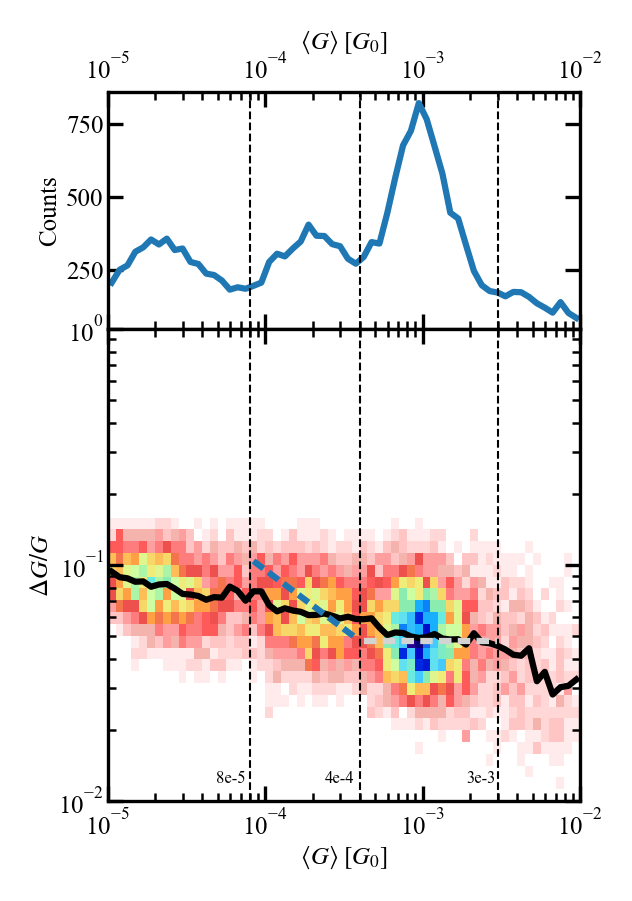

In [52]:
fig = plt.figure(figsize=utils.cm2inch(5, 7.5), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 2),
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.1, hspace=0)

ax_1d = fig.add_subplot(gs[0])
ax_2d = fig.add_subplot(gs[1])

ax_1d.xaxis.tick_top()
ax_1d.xaxis.set_label_position('top')
ax_1d.xaxis.set_ticks_position('both')
ax_1d.yaxis.set_ticks_position('both')

ax_2d.xaxis.set_ticks_position('both')
ax_2d.yaxis.set_ticks_position('both')

ax_1d.plot(xbins, np.sum(h_both_2, axis=1))
ax_1d.axvline(8e-5, ls='--', c='k', lw=0.5)
ax_1d.axvline(4e-4, ls='--', c='k', lw=0.5)
ax_1d.axvline(3e-3, ls='--', c='k', lw=0.5)
ax_1d.set_xscale('log')
ax_1d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_1d.set_ylabel('Counts')

ax_2d.pcolormesh(x_mesh, y_mesh, h_both_2.T, cmap=utils.cmap_geo32)
ax_2d.set_xscale('log')
ax_2d.set_yscale('log')
ax_2d.set_xlabel(r'$\langle G \rangle \; [G_{0}]$')
ax_2d.set_ylabel(r'$\Delta G/G$')
ax_2d.plot(xbins, 10**gauss_fit_params[:, 1], c='k')
ax_2d.plot(xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)], xbins[np.bitwise_and(xbins>8e-5, xbins<=4e-4)]**-0.5/1050, ls=(0, (2, 1)))
ax_2d.plot(xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)], xbins[np.bitwise_and(xbins>=4e-4, xbins<3e-3)]**0/21, ls=(0, (2, 1)), c='lightgrey')
ax_2d.axvline(8e-5, ls='--', c='k', lw=0.5)
ax_2d.axvline(4e-4, ls='--', c='k', lw=0.5)
ax_2d.axvline(3e-3, ls='--', c='k', lw=0.5)
ax_2d.text(7.5e-5, 1.2e-2, '8e-5', fontsize=4, ha='right')
ax_2d.text(3.7e-4, 1.2e-2, '4e-4', fontsize=4, ha='right')
ax_2d.text(2.9e-3, 1.2e-2, '3e-3', fontsize=4, ha='right')

ax_1d.set_xlim(1e-5, 1e-2)
ax_2d.set_xlim(1e-5, 1e-2)

In [34]:
256//4

64

In [35]:
which_trace=np.random.choice(pc_nori.traces_group2['PC4'])
print(which_trace)

42053


Text(0.5, 1.0, 'trace 42053')

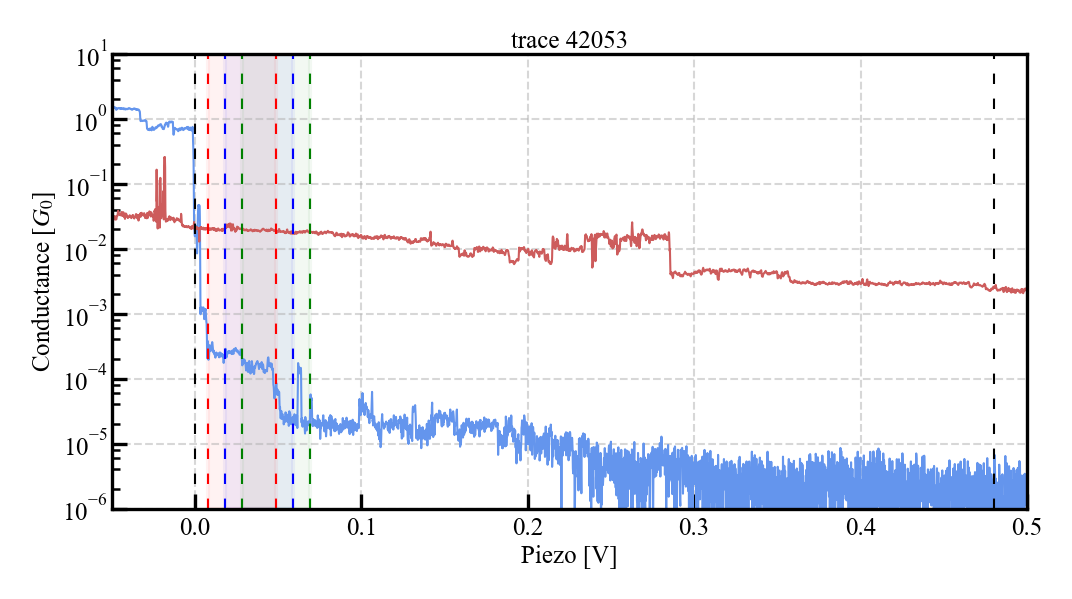

In [36]:
trace_pair = TracePair(which_trace, load_from=home_folder)
trace_pair.align_trace(align_at=2e-2)
fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax = trace_pair.plot_trace_pair(aligned=True, dpi=300, ax=ax)
ax.set_ylim(1e-6, 10)
ax.set_xlim(-0.05, 0.5)
ax.axvline(0, ls=(0, (5, 7)), lw=0.5, c='k')
#----------------------------------------------------
ax.axvline(8/50_000*50, ls=(0, (5, 7)), lw=0.5, c='r')
ax.axvline(8/50_000*(50+256), ls=(0, (5, 7)), lw=0.5, c='r')
ax.axvspan(8/50_000*(50), 8/50_000*(50+256), alpha=0.05, color='r')
#----------------------------------------------------
ax.axvline(8/50_000*(50+64), ls=(0, (5, 7)), lw=0.5, c='b')
ax.axvline(8/50_000*(50+64+256), ls=(0, (5, 7)), lw=0.5, c='b')
ax.axvspan(8/50_000*(50+64), 8/50_000*(50+64+256), alpha=0.05, color='b')
#----------------------------------------------------
ax.axvline(8/50_000*(50+2*64), ls=(0, (5, 7)), lw=0.5, c='g')
ax.axvline(8/50_000*(50+2*64+256), ls=(0, (5, 7)), lw=0.5, c='g')
ax.axvspan(8/50_000*(50+2*64), 8/50_000*(50+2*64+256), alpha=0.05, color='g')
#----------------------------------------------------
ax.axvline(8/50_000*3_000, ls=(0, (5, 7)), lw=0.5, c='k')
ax.set_title(f'trace {trace_pair.trace_num}', fontsize=6, pad=0)

In [2]:
traces = [36562, 36869, 39707, 41323]

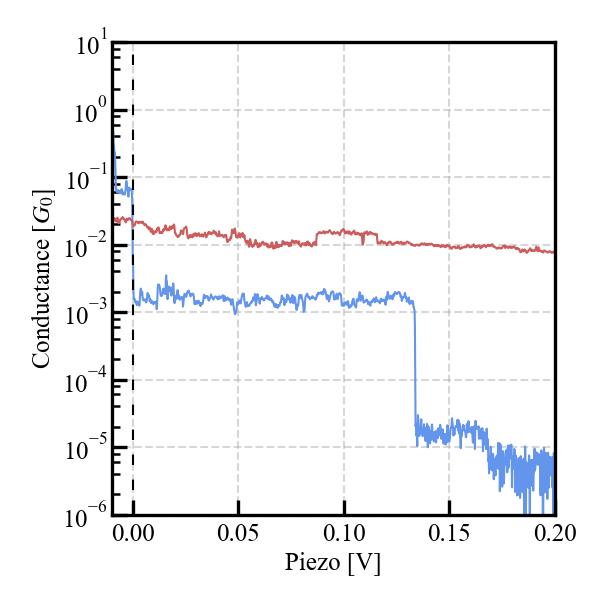

In [76]:
trace_pair = TracePair(traces[2], load_from=home_folder)
trace_pair.align_trace(align_at=2e-2)
ax = trace_pair.plot_trace_pair(aligned=True, dpi=300)
ax.set_ylim(1e-6, 10)
ax.set_xlim(-0.01, 0.2)
ax.axvline(0, ls=(0, (5, 7)), lw=0.5, c='k')

In [77]:
trace_pair.rate

8.0

In [24]:
after_evap = np.arange(start=36002, stop=56200, step=1)

In [29]:
# calculate histogram
hist = Histogram(folder=home_folder,
                     traces=after_evap,  #8000
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

hist.calc_stats(align_at=0.5,
                range_pull=(-0.5, 0.7),
                range_push=(-0.5, 1.5))

hist.calc_corr_hist_2d()

  0%|          | 0/20198 [00:00<?, ?it/s]

Pull 2D histogram created from 20198 traces
Push 2D histogram created from 20198 traces


  0%|          | 0/20198 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

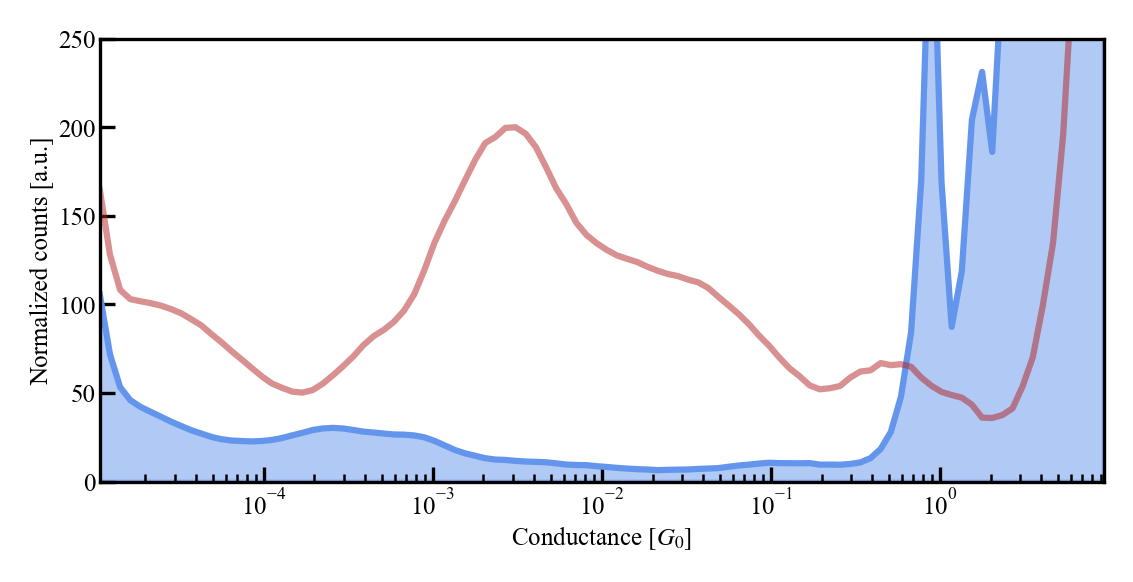

In [34]:
hist.plot_hist_1d(dpi=300, ylims=(0, 250))

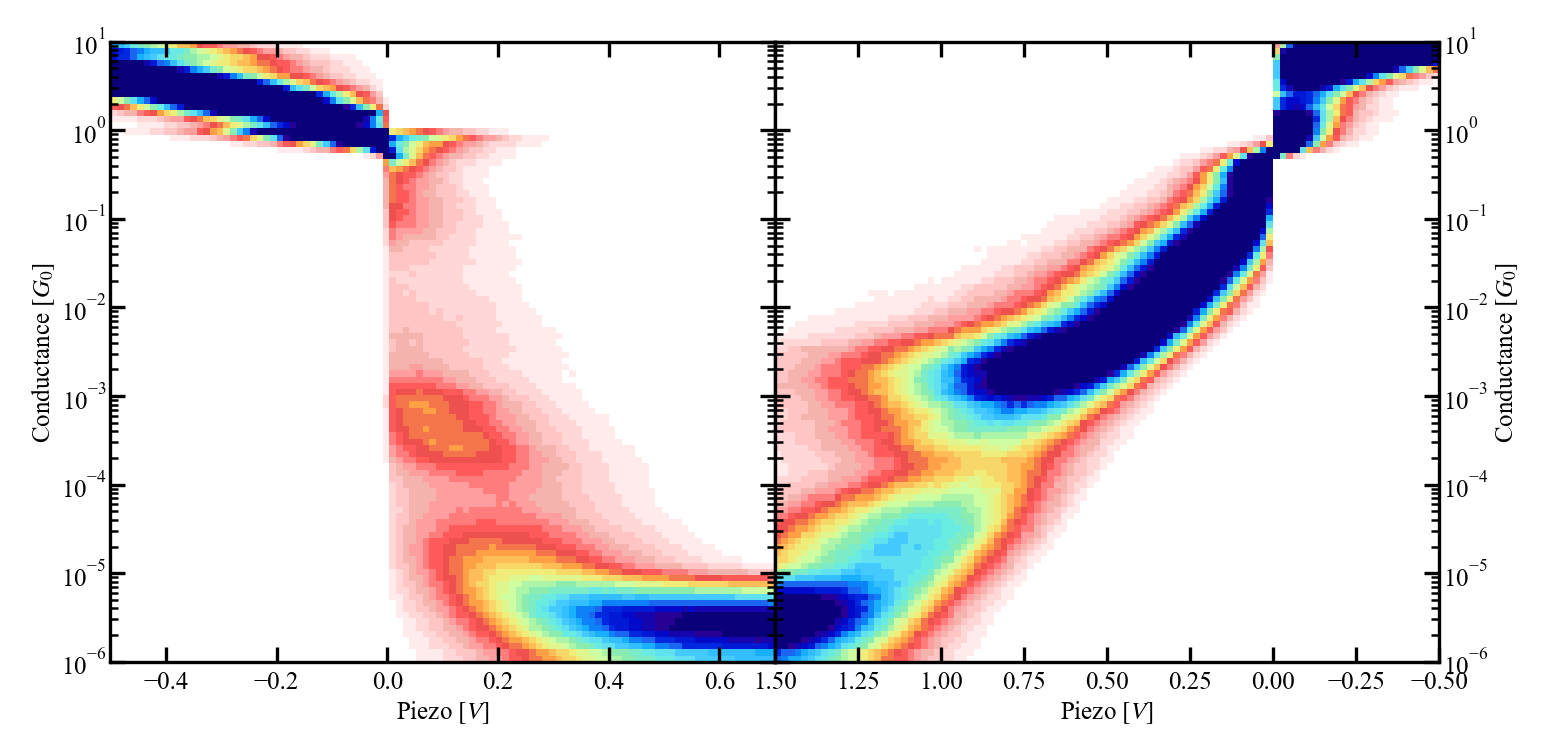

In [38]:
ax_pull, ax_push = hist.plot_hist_2d_both(dpi=300, vmax=100000)

In [39]:
after_evap2 = np.arange(start=36002, stop=44002, step=1)

In [40]:
# calculate histogram
hist2 = Histogram(folder=home_folder,
                     traces=after_evap2,  #8000
                     conductance_range=(1e-5, 10),
                     conductance_log_scale=True,
                     conductance_bins_num=100,
                     conductance_bins_mode='total')

hist2.calc_stats(align_at=0.5,
                range_pull=(-0.5, 0.7),
                range_push=(-0.5, 1.5))

hist2.calc_corr_hist_2d()

  0%|          | 0/8000 [00:00<?, ?it/s]

Pull 2D histogram created from 8000 traces
Push 2D histogram created from 8000 traces


  0%|          | 0/8000 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Conductance $[G_{0}]$', ylabel='Normalized counts [a.u.]'>

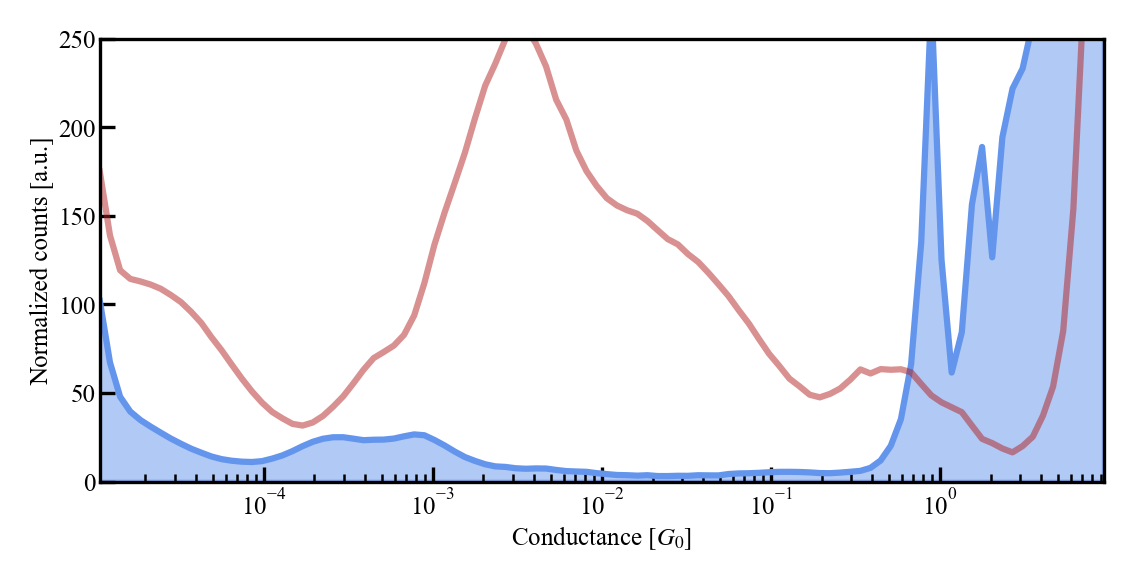

In [41]:
hist2.plot_hist_1d(dpi=300, ylims=(0, 250))

In [56]:
max(hist2.hist_2d_pull.flatten())*10/91

19524.835164835164

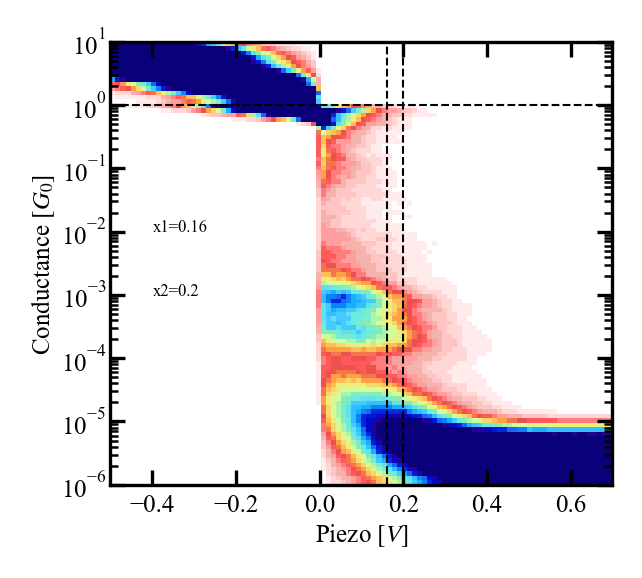

In [75]:
ax_pull = hist2.plot_hist_2d_one(direction='pull', dpi=300, vmax=19500)
ax_pull.axhline(1, ls='--', lw=0.5, c='k')
ax_pull.axvline(0.16, ls='--', lw=0.5, c='k')
ax_pull.axvline(0.2, ls='--', lw=0.5, c='k')
ax_pull.set_xticks(np.arange(-0.4, 0.61, step=0.2))
# ax_pull.set_xticklabels(list(map(str, np.round(2.5*np.arange(-0.4, 0.61, step=0.2)))))
ax_pull.text(-0.4, 1e-2, 'x1=0.16', fontsize=4)
ax_pull.text(-0.4, 1e-3, 'x2=0.2', fontsize=4)
plt.savefig(home_folder.joinpath('results/calibration_estimate.png'), bbox_inches='tight')